This notebook answers a few basics questions about the COSMOS field data-- how many objects and candidates were detected, how objects are distributed among candidates, and how those distributions change when an R/B cutoff is applied.

In [2]:
import psycopg2
import psycopg2.extras
import getpass
from IPython.display import display
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dbuser = 'kennedyt' # input("DB User: ")
dbpasswd = 'loq81a5ocd6m' # getpass.getpass("DB Password: ")
db = psycopg2.connect(f"dbname='decat' user='{dbuser}' password='{dbpasswd}' host='decatdb.lbl.gov'")

db.autocommit = True # Makes the computer nicer about SQL syntax errors

cursor = db.cursor( cursor_factory = psycopg2.extras.DictCursor )

#### How many objects total in the COSMOS field?

In [4]:
query = ( 'SELECT COUNT(*) FROM objects o '
         'WHERE q3c_radial_query(o.ra,o.dec,150,2.2,3) '
         'LIMIT 10000000')
cursor.execute( query )

objnum = cursor.fetchall()[0][0]
print( objnum )

1389922


#### How many good (R/B>0.6) objects total in the COSMOS field?

In [5]:
query = ( 'SELECT COUNT(*) FROM objects o '
         'WHERE q3c_radial_query(o.ra,o.dec,150,2.2,3) '
         'AND o.rb>0.6 '
         'LIMIT 10000000')
cursor.execute( query )

objnum = cursor.fetchall()[0][0]
print( objnum )

123757


#### How many candidates total in the COSMOS field?

In [4]:
query = ( 'SELECT COUNT(*) FROM candidates c '
         'WHERE q3c_radial_query(c.ra,c.dec,150,2.2,3) ' 
         'LIMIT 10000000')
cursor.execute( query )

candnum = cursor.fetchall()[0][0]
print( candnum )

188166


#### How many objects per candidate, on average? (COSMOS)

In [5]:
obj_per_cand_av = objnum / candnum
print( obj_per_cand_av ) # This matches what we get later

del candnum, objnum, obj_per_cand_av

7.3866798465185


#### How are the objects distributed among candidates (COSMOS, ignoring RB scores)?

In [17]:
### Returns objects.candidate_id for every object

query = ( 'SELECT candidate_id FROM objects o '
         'WHERE q3c_radial_query(o.ra,o.dec,150,2.2,3) '
         'LIMIT 10000000')
cursor.execute( query )

cndobj_a = np.array( cursor.fetchall() ).transpose()
cndobj_a

array([['DC21e', 'DC21c', 'DC21f', ..., 'DC21mmu', 'DC21ttw', 'DC21dahl']],
      dtype='<U9')

In [18]:
# Finding out how many objects have a given candidate id
candidate_a, frequencies_a = np.unique( cndobj_a[0], return_counts=True )

In [19]:
pd.DataFrame( frequencies_a, candidate_a, columns=["Number of detections"]) # visualization

,Number of detections
DC21b,145
DC21ba,134
DC21baa,37
DC21baaa,31
DC21baab,24
...,...
DC21zzv,69
DC21zzw,1
DC21zzx,78
DC21zzy,20


THIS PLOT HAS LIMITED X-AXIS RANGE FOR VISIBILITY, should go out to ~700
It also includes every object, regardless of rb score


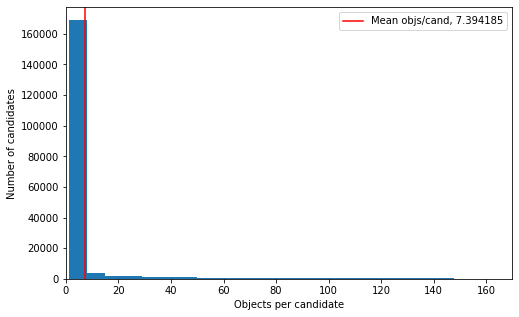

In [20]:
# Plotting it up
plt.figure( figsize=(8,5) )
plt.hist( frequencies_a, bins=100 )
plt.xlim( 0, 170 )
plt.xlabel( "Objects per candidate" )
plt.ylabel( "Number of candidates" )
plt.axvline( np.mean( frequencies_a ), label="Mean objs/cand, %f" % (np.mean(frequencies_a)), color='r' )
plt.legend()
print( "THIS PLOT HAS LIMITED X-AXIS RANGE FOR VISIBILITY, should go out to ~700" )
print( "It also includes every object, regardless of rb score" )

#### Same analysis, but for only "good" object detections (COSMOS, R/B>0.6)

In [21]:
query = ( 'SELECT candidate_id FROM objects o '
         'WHERE rb > 0.6 '
         'AND q3c_radial_query(o.ra,o.dec,150,2.2,3) ' 
         'LIMIT 10000000')
cursor.execute( query )

cndobj_g = np.array( cursor.fetchall() ).transpose()
cndobj_g

array([['DC21g', 'DC21k', 'DC21j', ..., 'DC21bivgn', 'DC21eamv',
        'DC21bpfj']], dtype='<U9')

In [22]:
# Finding out how many objects have a given candidate id
candidate_g, frequencies_g = np.unique( cndobj_g[0], return_counts=True )

THIS PLOT HAS LIMITED X-AXIS RANGE FOR VISIBILITY, should go out to ~350
It includes only objects with rb scores above 0.6


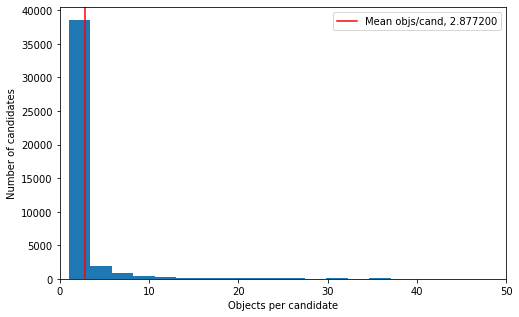

In [23]:
# Plotting it up
plt.figure( figsize=(8,5) )
plt.hist( frequencies_g, bins=150 )
plt.xlim( 0, 50 )
plt.xlabel( "Objects per candidate" )
plt.ylabel( "Number of candidates" )
plt.axvline( np.mean( frequencies_g ), label="Mean objs/cand, %f" % ( np.mean(frequencies_g) ), color='r' )
plt.legend()
print( "THIS PLOT HAS LIMITED X-AXIS RANGE FOR VISIBILITY, should go out to ~350" )
print( "It includes only objects with rb scores above 0.6" )